In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [5]:
qc_covid_data = pd.read_json("https://www.donneesquebec.ca/recherche/api/3/action/datastore_search?resource_id=d2cf4211-5400-46a3-9186-a81e6cd41de9&limit=10000")
qc_covid_data.head(10)

,help,success,result
_links,https://www.donneesquebec.ca/recherche/api/3/a...,True,{'start': '/api/3/action/datastore_search?limi...
fields,https://www.donneesquebec.ca/recherche/api/3/a...,True,"[{'type': 'int', 'id': '_id'}, {'type': 'text'..."
include_total,https://www.donneesquebec.ca/recherche/api/3/a...,True,True
limit,https://www.donneesquebec.ca/recherche/api/3/a...,True,10000
records,https://www.donneesquebec.ca/recherche/api/3/a...,True,"[{'_id': 1, 'Date': 'Date inconnue', 'Nb_Cas_C..."
records_format,https://www.donneesquebec.ca/recherche/api/3/a...,True,objects
resource_id,https://www.donneesquebec.ca/recherche/api/3/a...,True,d2cf4211-5400-46a3-9186-a81e6cd41de9
total,https://www.donneesquebec.ca/recherche/api/3/a...,True,694


In [113]:
# skipping the first record because it has a "date inconnue" bug
valid_records = qc_covid_data["result"]["records"][1:]
valid_records[0]

{'_id': 2,
 'Date': '2020-01-23',
 'Nb_Cas_Cumulatif': '0',
 'Nb_Nvx_Cas': '0',
 'Nb_Cas_Actifs': '0',
 'Nb_Deces_Cumulatif_Total': '0',
 'Nb_Deces_Cumulatif_CHCHSLD': '0',
 'Nb_Deces_Cumulatif_RPA': '0',
 'Nb_Deces_Cumulatif_DomInc': '0',
 'Nb_Deces_Cumulatif_Autre': '0',
 'Nb_Nvx_Deces_Total': '0',
 'Nb_Nvx_Deces_CHCHSLD': '0',
 'Nb_Nvx_Deces_RPA': '0',
 'Nb_Nvx_Deces_DomInc': '0',
 'Nb_Nvx_Deces_Autre': '0'}

In [58]:
# setting the format to datetime and numeric
dates, cases, deaths, death_ratio = list(), list(), list(), list()
for i in range(0,len(valid_records)): 
    dates.append(pd.to_datetime(valid_records[i]["Date"]))
    cases.append(pd.to_numeric(valid_records[i]["Nb_Nvx_Cas"])) 
    deaths.append(pd.to_numeric(valid_records[i]["Nb_Nvx_Deces_Total"]))
    if int(valid_records[i]["Nb_Nvx_Deces_Total"]) < 1:
        death_ratio.append(pd.to_numeric(0.0))
    else:
        death_ratio.append(pd.to_numeric(100*int(valid_records[i]["Nb_Nvx_Deces_Total"])/int(valid_records[i]["Nb_Nvx_Cas"])))


In [111]:
data = {"date":dates, "cases":cases, "deaths":deaths, "death_ratio":death_ratio}
new_cases_df = pd.DataFrame(data,columns=["date","cases","deaths","death_ratio"])

# let's create a color column from the values of cases
# could be interesting to try with percentiles instead of ratio of the max
def cases_to_color(cases, max_cases):
    if (cases > max_cases * 2/3): return "m"
    if (cases > max_cases * 1/2): return "r"
    if (cases > max_cases * 1/6): return "y"
    if (cases > max_cases * 1/10): return "b"
    if (cases > max_cases * 1/30): return "c" 
    return "g"

cmax = new_cases_df["deaths"].max()
new_cases_df["color"] = new_cases_df["deaths"]
new_cases_df["color"] = new_cases_df["color"].apply(lambda x: cases_to_color(x,cmax))
new_cases_df[450:480]

,date,cases,deaths,death_ratio,color
450,2021-04-17,1293,13,1.005414,c
451,2021-04-18,1025,10,0.975610,c
452,2021-04-19,1190,10,0.840336,c
453,2021-04-20,1221,7,0.573301,c
454,2021-04-21,1198,4,0.333890,g
455,2021-04-22,1095,14,1.278539,c
456,2021-04-23,921,8,0.868621,c
457,2021-04-24,1198,12,1.001669,c
458,2021-04-25,892,10,1.121076,c
459,2021-04-26,969,9,0.928793,c


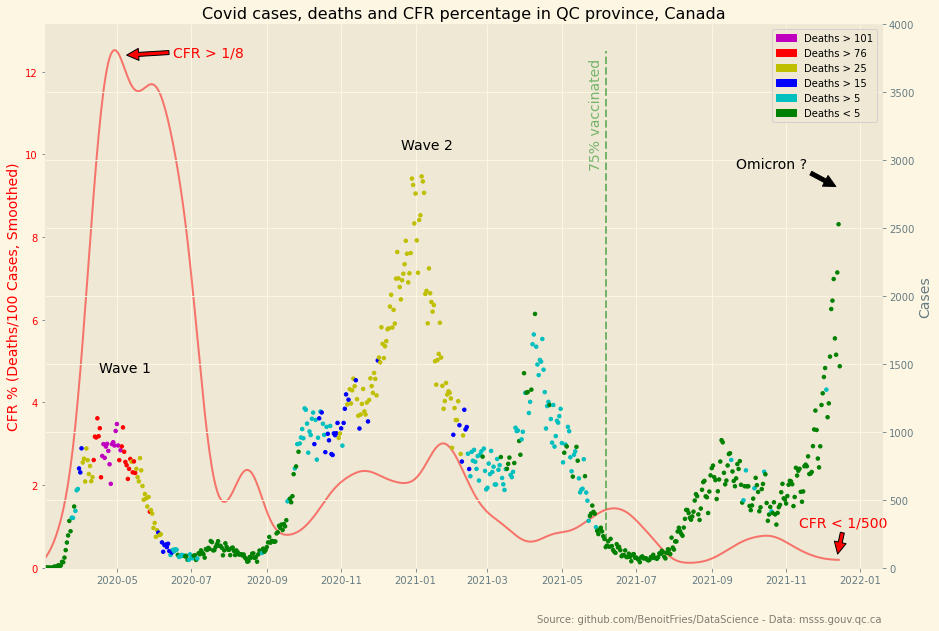

In [141]:
with plt.style.context('Solarize_Light2'):
    fig, ax_ratio = plt.subplots(figsize=(15,10))
    
    ## put the death ratio on the same ax but with a different scale
    from scipy.ndimage.filters import gaussian_filter1d
    smoothed_ratio = gaussian_filter1d(new_cases_df["death_ratio"], sigma=10)
    ax_ratio.plot(new_cases_df["date"],smoothed_ratio, color="r", alpha=0.5)
    ax_ratio.set_ylabel('CFR % (Deaths/100 Cases, Smoothed)', fontsize=14, color="r")
    ax_ratio.tick_params(axis='y', labelcolor="r")
    ax_ratio.grid(axis="y", visible=False)
    ax_ratio.set_ylim(0)
    
    ax = ax_ratio.twinx()
    ax.scatter(new_cases_df["date"],new_cases_df["cases"],c=new_cases_df["color"], s=12)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    plt.ylim(0,4000)
    plt.xlim(left=new_cases_df["date"][40])
    plt.title('Covid cases, deaths and CFR percentage in QC province, Canada')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cases', fontsize=14)
    
    # anotating dates is tricky with matplotlib
    # mdates.date2num solves the issue
    ax.annotate('Wave 1', xy=(mdates.date2num(new_cases_df["date"][90]), new_cases_df["cases"][90]+300),  
                xycoords='data', xytext=(45,45), textcoords='offset points',
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    ax.annotate('Wave 2', xy=(mdates.date2num(new_cases_df["date"][350]), new_cases_df["cases"][350]+100), 
                xycoords='data', xytext=(30,30), textcoords='offset points',
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    ax.annotate('Omicron ?', xy=(mdates.date2num(new_cases_df["date"][690]), 2800),  xycoords='data',
            xytext=(-30,30), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    # show max and min CFR
    ax_ratio.annotate('CFR > 1/8', c="r",
                xy=(mdates.date2num(new_cases_df["date"][105]), 12.4),  xycoords='data',
            xytext=(120,10), textcoords='offset points', arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    ax_ratio.annotate('CFR < 1/500', c = "r",
                xy=(mdates.date2num(new_cases_df["date"][690]), 0.3),  xycoords='data',
            xytext=(50,40), textcoords='offset points', arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=14,
            )
    
    # vaccination 75% (vertical line)
    ax.axvline(x=mdates.date2num(new_cases_df["date"][500]), ymin=0.05, ymax=0.95, ls="--", alpha=0.5, c="g")
    ax.annotate('75% vaccinated', alpha=0.5, c="g", xy=(mdates.date2num(new_cases_df["date"][500]), 3000), 
                xytext=(-10, -10), textcoords='offset points',
             rotation=90, va='bottom', ha='center', annotation_clip=False,fontsize=14)

    
    # this should be automated in the cases_to_color section
    # having to update two different places when colors are changed is not optimal
    magenta = mpatches.Patch(color='m', label='Deaths > ' + str(round(cmax/1.5)))
    red = mpatches.Patch(color='r', label='Deaths > ' + str(round(cmax/2)))
    yellow = mpatches.Patch(color='y', label='Deaths > '+ str(round(cmax/6)))
    green = mpatches.Patch(color='g', label='Deaths < ' + str(round(cmax/30)))
    blue = mpatches.Patch(color='b', label='Deaths > '+ str(round(cmax/10)))
    cyan = mpatches.Patch(color='c', label='Deaths > '+ str(round(cmax/30)))

    ax.legend(handles=[magenta,red,yellow,blue,cyan,green])
    
    plt.figtext(0.9, 0.05, 'Source: github.com/BenoitFries/DataScience - Data: msss.gouv.qc.ca', 
                horizontalalignment='right', alpha=0.5) 

plt.savefig("QC_Covid_Cases_and_Deaths")
plt.show()